# Monto Carlo Simulation of SP500

**Question: Start with 10k, invest 10k more annually, what is the probability that you will have at least 1mil after 30 years of investing inthe S&P 500 ETF**

In [33]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots

#for currency formatting
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [34]:
# trad savings calculator appraoach

pv = 10000
time_horizon = 30
i = 0.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(str(year) + ": " + locale.currency(ending, grouping=True))
    pv = ending


0: $20,700.00
1: $32,149.00
2: $44,399.43
3: $57,507.39
4: $71,532.91
5: $86,540.21
6: $102,598.03
7: $119,779.89
8: $138,164.48
9: $157,835.99
10: $178,884.51
11: $201,406.43
12: $225,504.88
13: $251,290.22
14: $278,880.54
15: $308,402.17
16: $339,990.33
17: $373,789.65
18: $409,954.92
19: $448,651.77
20: $490,057.39
21: $534,361.41
22: $581,766.71
23: $632,490.38
24: $686,764.70
25: $744,838.23
26: $806,976.91
27: $873,465.29
28: $944,607.86
29: $1,020,730.41


In [35]:
# Generate one possible future value based on market history
# We use 9% expected return with 18% volatility

pv = 10000
expected_return =  0.09
volatility = 0.18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return     		Ending Value
	0.1256               	$21,255.87
	0.3005               	$37,642.93
	0.2522               	$57,136.77
	0.0133               	$67,897.63
	0.0237               	$79,507.60
	-0.0447               	$85,950.69
	-0.2712               	$72,645.11
	-0.0604               	$78,253.82
	0.1423               	$99,386.66
	-0.0531               	$104,108.33
	0.2068               	$135,638.92
	0.4619               	$208,289.74
	0.1266               	$244,657.71
	0.0476               	$266,315.45
	0.0378               	$286,379.90
	-0.2041               	$237,923.64
	0.303               	$320,016.10
	0.1285               	$371,143.98
	0.0079               	$384,091.39
	-0.3928               	$243,215.70
	0.4909               	$372,604.67
	-0.2518               	$288,766.09
	-0.0551               	$282,863.56
	0.0284               	$300,896.28
	0.0109               	$314,172.24
	-0.1274               	$284,132.67
	0.084               	$317,999.91
	-0.1614               	$276,6

In [56]:
# 4. Simulate portfolio ending market values 

sim = DataFrame()
iterations = 100



for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [46]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,17165.25,19987.10,20623.19,19854.84,20966.31
1,25232.58,29879.84,30320.04,37726.89,31082.41
2,38228.41,36903.03,47261.79,55276.39,42196.70
3,50807.71,50474.68,57344.77,65174.57,51965.85
4,54680.58,56952.09,71071.71,104222.56,66627.63
5,56328.24,84112.80,98313.44,112356.25,75924.09
6,78503.86,84623.72,127022.99,147230.97,83732.01
7,94165.54,78937.11,146666.56,195459.23,127086.41
8,109386.47,101734.84,175852.02,229063.13,157289.23
9,141145.02,139340.25,207979.07,332572.58,203938.51


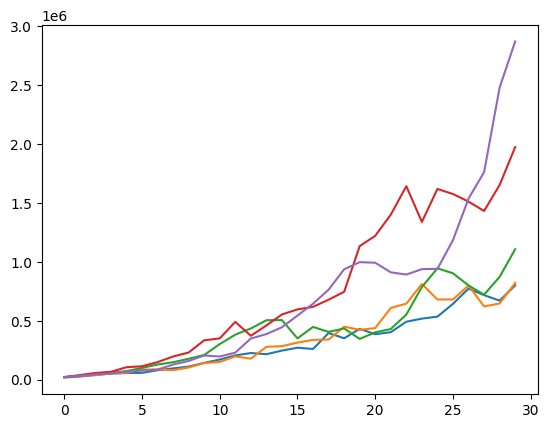

In [47]:
# 6. Plot first five simulated portfolios
plots.plot(sim[first_five])

In [48]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 100
Mean:  $1,470,811.87
SD:  $1,648,234.02
Max:  $15,738,468.99
Min:  $145,378.30


In [49]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()

count    1.000000e+02
mean     1.470812e+06
std      1.656538e+06
min      1.453783e+05
25%      7.493904e+05
50%      1.133399e+06
75%      1.789788e+06
max      1.573847e+07
Name: 29, dtype: float64

(array([ 4.,  6.,  8., 11.,  7., 10.,  9.,  8.,  5.,  5.,  3.,  5.,  4.,
         1.,  4.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  145378.3   ,   301309.2069,   457240.1138,   613171.0207,
          769101.9276,   925032.8345,  1080963.7414,  1236894.6483,
         1392825.5552,  1548756.4621,  1704687.369 ,  1860618.2759,
         2016549.1828,  2172480.0897,  2328410.9966,  2484341.9035,
         2640272.8104,  2796203.7173,  2952134.6242,  3108065.5311,
         3263996.438 ,  3419927.3449,  3575858.2518,  3731789.1587,
         3887720.0656,  40

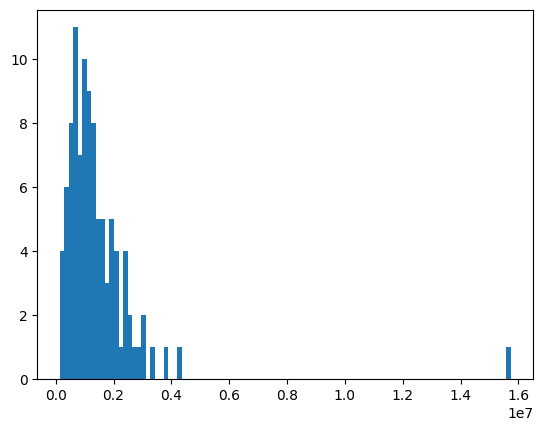

In [50]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)

In [51]:
# 10. Calculate probability of seeing a specific ending_value or less, 
# for example get close to the 75%ile, or $1,000,000

len(ending_values[ending_values<1000000]) / len(ending_values)

0.4

In [52]:
# 11. You can't really get a point estimate, but you can get a range ending values

len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.16

In [53]:
# 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $360,883.06
      10%-ile:  $469,039.99
      15%-ile:  $525,891.70
      25%-ile:  $749,390.37
      75%-ile:  $1,789,787.99
      85%-ile:  $2,186,291.08
      90%-ile:  $2,487,124.42
      95%-ile:  $2,958,102.18
